In [1]:
from archappl.client import ArchiverDataClient
from archappl.contrib import get_dataset
from archappl.contrib import get_dataset_at_time
from archappl import dformat

from phantasy import MachinePortal
from phantasy import disable_warnings
disable_warnings()

from datetime import datetime
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams;

In [3]:
data_client = ArchiverDataClient()
data_client.url = "http://127.0.0.1:17665"

In [4]:
mp = MachinePortal("FRIB_VA", "LS1FS1")
bpms = mp.get_elements(type="BPM")
hcors = mp.get_elements(type='HCOR')
vcors = mp.get_elements(type='VCOR')

In [5]:
bpm_x_pv_list = [i.pv('X', handle='readback')[0] for i in bpms]
bpm_x_pv_list = [i.pv('Y', handle='readback')[0] for i in bpms]
cor_x_pv_list = [i.pv('I', handle='setpoint')[0] for i in hcors]
cor_y_pv_list = [i.pv('I', handle='setpoint')[0] for i in vcors]
field_list = ['X', 'Y']
pv1 = cor_x_pv_list[0]
pv2 = bpm_x_pv_list[0]

In [6]:
t0 = dformat(2020, 11, 16, 15, 10) #, time_zone='America/New_York')
t1 = dformat(2020, 11, 16, 16, 17)

In [12]:
from archappl.contrib.data import _to_df
r = data_client.get_data_at_time(cor_x_pv_list, at_time=t0)
_df1 = _to_df(r)

In [46]:
df1 = get_dataset_at_time(hcors, ['I'], t0, handle='setpoint', client=data_client, tz='UTC')

In [40]:
_df11 = _df1.sort_values('PV')
_df11.index = list(range(_df11.shape[0]))

In [47]:
df11 = df1.sort_values('PV')
df11.index = list(range(df11.shape[0]))

In [51]:
_df1.head()

,PV,val,status,severity,time
0,VA:LS1_CB08:DCH_D1701:I_CSET,0.000012,0,0,2020-11-16 19:24:21.082000+00:00
1,VA:FS1_CSS:DCH_D2381:I_CSET,0.000000,0,0,2020-11-16 19:24:21.188000+00:00
2,VA:LS1_CB02:DCH_D1339:I_CSET,-0.000018,0,0,2020-11-16 19:24:21.005000+00:00
3,VA:FS1_CSS:DCH_D2210:I_CSET,0.000000,0,0,2020-11-16 19:24:21.165000+00:00
4,VA:LS1_CB05:DCH_D1490:I_CSET,0.000005,0,0,2020-11-16 19:24:21.037000+00:00


In [52]:
df1.head()

,PV,val,status,severity,time
0,VA:LS1_CB08:DCH_D1701:I_CSET,0.000012,0,0,2020-11-16 19:24:21.082000+00:00
1,VA:FS1_CSS:DCH_D2381:I_CSET,0.000000,0,0,2020-11-16 19:24:21.188000+00:00
2,VA:LS1_CB02:DCH_D1339:I_CSET,-0.000018,0,0,2020-11-16 19:24:21.005000+00:00
3,VA:FS1_CSS:DCH_D2210:I_CSET,0.000000,0,0,2020-11-16 19:24:21.165000+00:00
4,VA:LS1_CB05:DCH_D1490:I_CSET,0.000005,0,0,2020-11-16 19:24:21.037000+00:00


In [45]:
df1['D####'] = df1['PV'].str.extract(r"(D\d{4})")

In [46]:
df1.sort_values('D####')

,PV,val,status,severity,time,D####
17,VA:LS1_CA01:DCH_D1132:I_CSET,2.150000e-06,0,0,2020-11-16 14:20:56.940000-05:00,D1132
36,VA:LS1_CA01:DCH_D1146:I_CSET,-1.587000e-05,0,0,2020-11-16 14:24:20.949000-05:00,D1146
33,VA:LS1_CA02:DCH_D1165:I_CSET,-6.750000e-06,0,0,2020-11-16 14:24:20.953000-05:00,D1165
34,VA:LS1_CA02:DCH_D1180:I_CSET,-7.800000e-07,0,0,2020-11-16 14:24:20.960000-05:00,D1180
8,VA:LS1_CA03:DCH_D1199:I_CSET,1.336000e-05,0,0,2020-11-16 14:24:20.966000-05:00,D1199
12,VA:LS1_CA03:DCH_D1214:I_CSET,-1.875000e-05,0,0,2020-11-16 14:24:20.975000-05:00,D1214
56,VA:LS1_CB01:DCH_D1235:I_CSET,2.018000e-05,0,0,2020-11-16 14:24:20.983000-05:00,D1235
39,VA:LS1_CB01:DCH_D1255:I_CSET,3.947000e-05,0,0,2020-11-16 14:24:20.986000-05:00,D1255
46,VA:LS1_CB01:DCH_D1275:I_CSET,-2.849000e-05,0,0,2020-11-16 14:24:20.992000-05:00,D1275
18,VA:LS1_CB02:DCH_D1299:I_CSET,1.381000e-05,0,0,2020-11-16 14:24:20.997000-05:00,D1299


In [9]:
data_client.get_data(pv1, ts_from=t0, ts_to=t1)

,val,status,severity
time,,,
2020-11-16 14:20:56.940000-05:00,0.000002,0,0


In [10]:
df = data_client.get_data(pv2, ts_from=t0)

In [11]:
df

,val,status,severity
time,,,
2020-11-16 15:09:59.922000-05:00,-0.000008,0,0
2020-11-16 15:10:01.263000-05:00,-0.000008,0,0
2020-11-16 15:10:02.187000-05:00,-0.000007,0,0
2020-11-16 15:10:03.499000-05:00,-0.000008,0,0
2020-11-16 15:10:04.971000-05:00,-0.000008,0,0
...,...,...,...
2020-11-20 13:29:24.752000-05:00,-0.000008,0,0
2020-11-20 13:29:25.822000-05:00,-0.000008,0,0
2020-11-20 13:29:26.970000-05:00,-0.000007,0,0


In [12]:
data_set = get_dataset(bpms, field_list, t0, t1,
                       resample="1S", verbose=1, client=data_client)


[2020-11-20T14:38:38.475309] Fetched all, time cost: 4.8 seconds.


In [13]:
data_set.head()

,VA:LS1_CA01:BPM_D1129:X_RD,VA:LS1_CA01:BPM_D1129:Y_RD,VA:LS1_CA01:BPM_D1144:X_RD,VA:LS1_CA01:BPM_D1144:Y_RD,VA:LS1_WA01:BPM_D1155:X_RD,VA:LS1_WA01:BPM_D1155:Y_RD,VA:LS1_CA02:BPM_D1163:X_RD,VA:LS1_CA02:BPM_D1163:Y_RD,VA:LS1_CA02:BPM_D1177:X_RD,VA:LS1_CA02:BPM_D1177:Y_RD,...,VA:FS1_BMS:BPM_D2587:X_RD,VA:FS1_BMS:BPM_D2587:Y_RD,VA:FS1_BMS:BPM_D2600:X_RD,VA:FS1_BMS:BPM_D2600:Y_RD,VA:FS1_BMS:BPM_D2665:X_RD,VA:FS1_BMS:BPM_D2665:Y_RD,VA:FS1_BMS:BPM_D2690:X_RD,VA:FS1_BMS:BPM_D2690:Y_RD,VA:FS1_BMS:BPM_D2702:X_RD,VA:FS1_BMS:BPM_D2702:Y_RD
time,,,,,,,,,,,,,,,,,,,,,
2020-11-16 15:10:00-05:00,0.000005,-0.000008,-0.000118,-0.000336,-0.000087,-0.000095,-2.884984e-07,-0.000364,0.000200,-0.000218,...,0.000679,-0.003908,0.000518,-0.002564,-0.001352,-0.002718,-0.000976,-0.000615,-0.000319,0.001734
2020-11-16 15:10:01-05:00,0.000005,-0.000008,-0.000118,-0.000336,-0.000087,-0.000095,-2.884984e-07,-0.000364,0.000200,-0.000218,...,0.000679,-0.003908,0.000518,-0.002564,-0.001352,-0.002718,-0.000976,-0.000615,-0.000319,0.001734
2020-11-16 15:10:02-05:00,0.000005,-0.000008,-0.000118,-0.000337,-0.000087,-0.000095,-1.694410e-06,-0.000363,0.000202,-0.000216,...,0.000682,-0.004213,0.000523,-0.002724,-0.001348,-0.002530,-0.000973,-0.000517,-0.000319,0.001664
2020-11-16 15:10:03-05:00,0.000005,-0.000007,-0.000118,-0.000337,-0.000087,-0.000095,-3.045372e-06,-0.000365,0.000202,-0.000219,...,0.000601,-0.003910,0.000414,-0.002575,-0.001285,-0.002793,-0.000877,-0.000642,-0.000264,0.001772
2020-11-16 15:10:04-05:00,0.000005,-0.000008,-0.000119,-0.000338,-0.000087,-0.000095,1.591524e-06,-0.000362,0.000202,-0.000217,...,0.000635,-0.003761,0.000447,-0.002463,-0.001329,-0.002612,-0.000916,-0.000593,-0.000284,0.001667


In [15]:
data_set.head()

,VA:LS1_CA01:BPM_D1129:X_RD,VA:LS1_CA01:BPM_D1129:Y_RD,VA:LS1_CA01:BPM_D1144:X_RD,VA:LS1_CA01:BPM_D1144:Y_RD,VA:LS1_WA01:BPM_D1155:X_RD,VA:LS1_WA01:BPM_D1155:Y_RD,VA:LS1_CA02:BPM_D1163:X_RD,VA:LS1_CA02:BPM_D1163:Y_RD,VA:LS1_CA02:BPM_D1177:X_RD,VA:LS1_CA02:BPM_D1177:Y_RD,...,VA:FS1_BMS:BPM_D2587:X_RD,VA:FS1_BMS:BPM_D2587:Y_RD,VA:FS1_BMS:BPM_D2600:X_RD,VA:FS1_BMS:BPM_D2600:Y_RD,VA:FS1_BMS:BPM_D2665:X_RD,VA:FS1_BMS:BPM_D2665:Y_RD,VA:FS1_BMS:BPM_D2690:X_RD,VA:FS1_BMS:BPM_D2690:Y_RD,VA:FS1_BMS:BPM_D2702:X_RD,VA:FS1_BMS:BPM_D2702:Y_RD
time,,,,,,,,,,,,,,,,,,,,,
2020-11-16 15:10:00-05:00,0.000005,-0.000008,-0.000118,-0.000336,-0.000087,-0.000095,-2.884984e-07,-0.000364,0.000200,-0.000218,...,0.000679,-0.003908,0.000518,-0.002564,-0.001352,-0.002718,-0.000976,-0.000615,-0.000319,0.001734
2020-11-16 15:10:01-05:00,0.000005,-0.000008,-0.000118,-0.000336,-0.000087,-0.000095,-2.884984e-07,-0.000364,0.000200,-0.000218,...,0.000679,-0.003908,0.000518,-0.002564,-0.001352,-0.002718,-0.000976,-0.000615,-0.000319,0.001734
2020-11-16 15:10:02-05:00,0.000005,-0.000008,-0.000118,-0.000337,-0.000087,-0.000095,-1.694410e-06,-0.000363,0.000202,-0.000216,...,0.000682,-0.004213,0.000523,-0.002724,-0.001348,-0.002530,-0.000973,-0.000517,-0.000319,0.001664
2020-11-16 15:10:03-05:00,0.000005,-0.000007,-0.000118,-0.000337,-0.000087,-0.000095,-3.045372e-06,-0.000365,0.000202,-0.000219,...,0.000601,-0.003910,0.000414,-0.002575,-0.001285,-0.002793,-0.000877,-0.000642,-0.000264,0.001772
2020-11-16 15:10:04-05:00,0.000005,-0.000008,-0.000119,-0.000338,-0.000087,-0.000095,1.591524e-06,-0.000362,0.000202,-0.000217,...,0.000635,-0.003761,0.000447,-0.002463,-0.001329,-0.002612,-0.000916,-0.000593,-0.000284,0.001667


In [16]:
data_set.tail()

,VA:LS1_CA01:BPM_D1129:X_RD,VA:LS1_CA01:BPM_D1129:Y_RD,VA:LS1_CA01:BPM_D1144:X_RD,VA:LS1_CA01:BPM_D1144:Y_RD,VA:LS1_WA01:BPM_D1155:X_RD,VA:LS1_WA01:BPM_D1155:Y_RD,VA:LS1_CA02:BPM_D1163:X_RD,VA:LS1_CA02:BPM_D1163:Y_RD,VA:LS1_CA02:BPM_D1177:X_RD,VA:LS1_CA02:BPM_D1177:Y_RD,...,VA:FS1_BMS:BPM_D2587:X_RD,VA:FS1_BMS:BPM_D2587:Y_RD,VA:FS1_BMS:BPM_D2600:X_RD,VA:FS1_BMS:BPM_D2600:Y_RD,VA:FS1_BMS:BPM_D2665:X_RD,VA:FS1_BMS:BPM_D2665:Y_RD,VA:FS1_BMS:BPM_D2690:X_RD,VA:FS1_BMS:BPM_D2690:Y_RD,VA:FS1_BMS:BPM_D2702:X_RD,VA:FS1_BMS:BPM_D2702:Y_RD
time,,,,,,,,,,,,,,,,,,,,,
2020-11-16 16:16:55-05:00,0.000005,-0.000007,-0.000118,-0.000335,-0.000209,-0.000129,-0.000096,-0.000134,0.000062,0.000033,...,-0.000043,-0.000690,-0.000365,-0.000411,-4.586796e-04,0.000004,0.000090,8.568402e-05,0.000240,0.000074
2020-11-16 16:16:56-05:00,0.000005,-0.000007,-0.000117,-0.000335,-0.000143,-0.000061,0.000054,0.000021,0.000013,-0.000006,...,-0.000019,0.000002,-0.000041,0.000002,-1.938848e-06,0.000003,0.000020,2.789564e-08,0.000036,-0.000002
2020-11-16 16:16:57-05:00,0.000005,-0.000008,-0.000118,-0.000337,-0.000142,-0.000060,0.000059,0.000024,0.000011,-0.000005,...,0.000034,0.000014,0.000040,0.000009,-3.649689e-05,0.000004,-0.000061,1.509702e-08,-0.000016,-0.000003
2020-11-16 16:16:58-05:00,0.000005,-0.000007,-0.000118,-0.000337,-0.000143,-0.000062,0.000056,0.000021,0.000013,-0.000005,...,0.000008,0.000068,0.000012,0.000041,-8.031803e-08,-0.000006,-0.000020,-1.142599e-05,0.000006,-0.000005
2020-11-16 16:16:59-05:00,0.000005,-0.000007,-0.000118,-0.000337,-0.000143,-0.000062,0.000056,0.000021,0.000013,-0.000005,...,0.000008,0.000068,0.000012,0.000041,-8.031803e-08,-0.000006,-0.000020,-1.142599e-05,0.000006,-0.000005


In [17]:
data_set_x = data_set.iloc[:, 0::2]
data_set_y = data_set.iloc[:, 1::2]

In [18]:
data_set.shape

(4020, 150)

In [19]:
data_set_x.head()

,VA:LS1_CA01:BPM_D1129:X_RD,VA:LS1_CA01:BPM_D1144:X_RD,VA:LS1_WA01:BPM_D1155:X_RD,VA:LS1_CA02:BPM_D1163:X_RD,VA:LS1_CA02:BPM_D1177:X_RD,VA:LS1_WA02:BPM_D1188:X_RD,VA:LS1_CA03:BPM_D1196:X_RD,VA:LS1_CA03:BPM_D1211:X_RD,VA:LS1_WA03:BPM_D1222:X_RD,VA:LS1_CB01:BPM_D1231:X_RD,...,VA:FS1_CSS:BPM_D2383:X_RD,VA:FS1_BBS:BPM_D2421:X_RD,VA:FS1_BBS:BPM_D2466:X_RD,VA:FS1_BMS:BPM_D2502:X_RD,VA:FS1_BMS:BPM_D2537:X_RD,VA:FS1_BMS:BPM_D2587:X_RD,VA:FS1_BMS:BPM_D2600:X_RD,VA:FS1_BMS:BPM_D2665:X_RD,VA:FS1_BMS:BPM_D2690:X_RD,VA:FS1_BMS:BPM_D2702:X_RD
time,,,,,,,,,,,,,,,,,,,,,
2020-11-16 15:10:00-05:00,0.000005,-0.000118,-0.000087,-2.884984e-07,0.000200,0.000083,0.000225,-0.000030,0.000003,-0.000097,...,-0.001219,-0.002086,-0.004205,0.001470,0.001525,0.000679,0.000518,-0.001352,-0.000976,-0.000319
2020-11-16 15:10:01-05:00,0.000005,-0.000118,-0.000087,-2.884984e-07,0.000200,0.000083,0.000225,-0.000030,0.000003,-0.000097,...,-0.001219,-0.002086,-0.004205,0.001470,0.001525,0.000679,0.000518,-0.001352,-0.000976,-0.000319
2020-11-16 15:10:02-05:00,0.000005,-0.000118,-0.000087,-1.694410e-06,0.000202,0.000083,0.000222,-0.000030,0.000003,-0.000097,...,-0.001286,-0.002034,-0.004193,0.001471,0.001530,0.000682,0.000523,-0.001348,-0.000973,-0.000319
2020-11-16 15:10:03-05:00,0.000005,-0.000118,-0.000087,-3.045372e-06,0.000202,0.000083,0.000225,-0.000030,0.000003,-0.000099,...,-0.001115,-0.002134,-0.004155,0.001429,0.001457,0.000601,0.000414,-0.001285,-0.000877,-0.000264
2020-11-16 15:10:04-05:00,0.000005,-0.000119,-0.000087,1.591524e-06,0.000202,0.000083,0.000220,-0.000031,0.000003,-0.000097,...,-0.001199,-0.002075,-0.004187,0.001485,0.001519,0.000635,0.000447,-0.001329,-0.000916,-0.000284


In [20]:
data_set_y.head()

,VA:LS1_CA01:BPM_D1129:Y_RD,VA:LS1_CA01:BPM_D1144:Y_RD,VA:LS1_WA01:BPM_D1155:Y_RD,VA:LS1_CA02:BPM_D1163:Y_RD,VA:LS1_CA02:BPM_D1177:Y_RD,VA:LS1_WA02:BPM_D1188:Y_RD,VA:LS1_CA03:BPM_D1196:Y_RD,VA:LS1_CA03:BPM_D1211:Y_RD,VA:LS1_WA03:BPM_D1222:Y_RD,VA:LS1_CB01:BPM_D1231:Y_RD,...,VA:FS1_CSS:BPM_D2383:Y_RD,VA:FS1_BBS:BPM_D2421:Y_RD,VA:FS1_BBS:BPM_D2466:Y_RD,VA:FS1_BMS:BPM_D2502:Y_RD,VA:FS1_BMS:BPM_D2537:Y_RD,VA:FS1_BMS:BPM_D2587:Y_RD,VA:FS1_BMS:BPM_D2600:Y_RD,VA:FS1_BMS:BPM_D2665:Y_RD,VA:FS1_BMS:BPM_D2690:Y_RD,VA:FS1_BMS:BPM_D2702:Y_RD
time,,,,,,,,,,,,,,,,,,,,,
2020-11-16 15:10:00-05:00,-0.000008,-0.000336,-0.000095,-0.000364,-0.000218,-0.000089,-0.000087,0.000028,0.000128,-0.000223,...,-0.001745,-0.001805,-0.000495,0.003418,0.005069,-0.003908,-0.002564,-0.002718,-0.000615,0.001734
2020-11-16 15:10:01-05:00,-0.000008,-0.000336,-0.000095,-0.000364,-0.000218,-0.000089,-0.000087,0.000028,0.000128,-0.000223,...,-0.001745,-0.001805,-0.000495,0.003418,0.005069,-0.003908,-0.002564,-0.002718,-0.000615,0.001734
2020-11-16 15:10:02-05:00,-0.000008,-0.000337,-0.000095,-0.000363,-0.000216,-0.000089,-0.000087,0.000029,0.000128,-0.000225,...,-0.002168,-0.001793,-0.000315,0.003669,0.005278,-0.004213,-0.002724,-0.002530,-0.000517,0.001664
2020-11-16 15:10:03-05:00,-0.000007,-0.000337,-0.000095,-0.000365,-0.000219,-0.000089,-0.000086,0.000030,0.000128,-0.000223,...,-0.001781,-0.001819,-0.000491,0.003450,0.005127,-0.003910,-0.002575,-0.002793,-0.000642,0.001772
2020-11-16 15:10:04-05:00,-0.000008,-0.000338,-0.000095,-0.000362,-0.000217,-0.000089,-0.000086,0.000029,0.000128,-0.000229,...,-0.001754,-0.001725,-0.000442,0.003307,0.004891,-0.003761,-0.002463,-0.002612,-0.000593,0.001667


In [30]:
data_set_x.to_csv('/tmp/x.csv')

In [75]:
#from pandasgui import show

In [31]:
#show(data_set_x)

In [32]:
import seaborn as sns

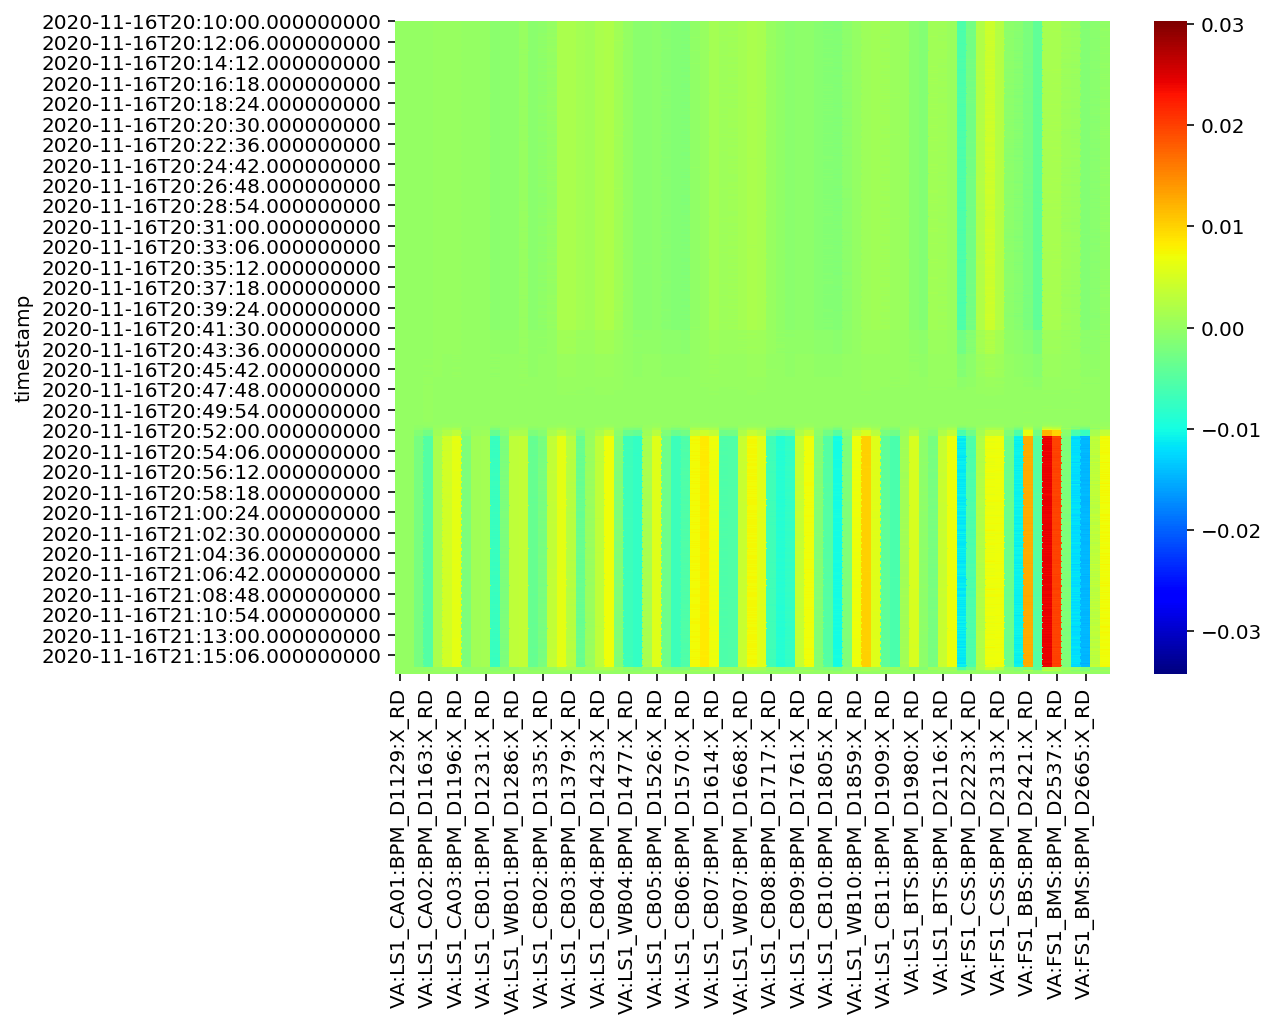

In [48]:
sns.heatmap(data_set_x, cmap='jet')

In [35]:
# plot 2D dataframe

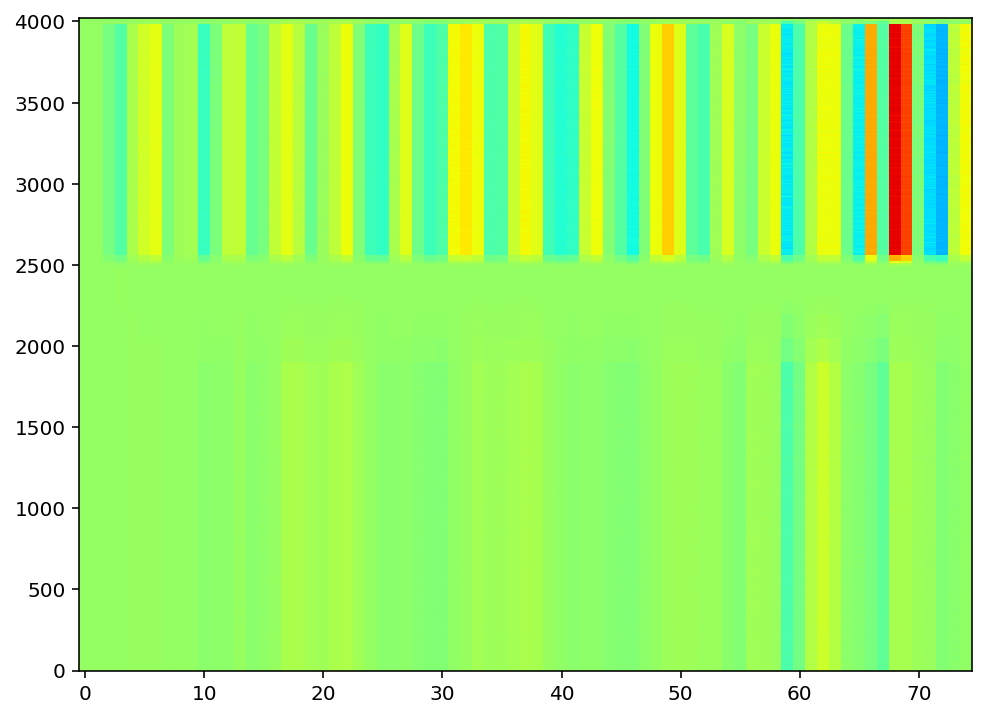

In [46]:
import matplotlib.pyplot as plt

a = data_set_x

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(a, aspect='auto', cmap='jet', origin='lower left')

In [49]:
data_set_x.to_csv('/home/tong/Dropbox/mpl4qt/mpl4qt/tests/x.csv')

In [56]:
aa = data_set_x.to_numpy(dtype='float64')

In [63]:
ny, nx = data_set_x.shape

In [64]:
nx, ny

(75, 4020)

In [20]:
from voyager import imshow

In [21]:
from voyager import tableview

In [21]:
imshow(data_set_x)

KeyboardInterrupt: 

In [67]:
ts = data_set_x.index[3268]

In [74]:
ts

Timestamp('2020-11-16 21:04:28+0000', tz='UTC', freq='S')

In [92]:
ts.isoformat()

'2020-11-16T21:04:28+00:00'

In [109]:
cors = mp.get_elements(type='*COR')
sp_pv_list = [i.pv('I', handle='setpoint')[0] for i in cors]
rd_pv_list = [i.pv('I', handle='readback')[0] for i in cors]

In [79]:
import pandas as pd
df0 = pd.DataFrame()


In [144]:
r = client.get_data_at_time(sp_pv_list, ts='2020-11-16T21:04:28.000000Z')

In [145]:
r

{'VA:LS1_CB08:DCH_D1701:I_CSET': {'severity': 0,
  'val': 0.0001815,
  'nanos': 810740048,
  'secs': 1605559958,
  'status': 0},
 'VA:LS1_BTS:DCV_D1937:I_CSET': {'severity': 0,
  'val': -1.07e-05,
  'nanos': 864890697,
  'secs': 1605559958,
  'status': 0},
 'VA:LS1_CB05:DCV_D1510:I_CSET': {'severity': 0,
  'val': -0.00102342,
  'nanos': 771165430,
  'secs': 1605559958,
  'status': 0},
 'VA:FS1_CSS:DCH_D2367:I_CSET': {'severity': 0,
  'val': -0.00093269,
  'nanos': 911136341,
  'secs': 1605559958,
  'status': 0},
 'VA:LS1_CB02:DCH_D1319:I_CSET': {'severity': 0,
  'val': -0.00035633,
  'nanos': 729325046,
  'secs': 1605559958,
  'status': 0},
 'VA:FS1_CSS:DCV_D2257:I_CSET': {'severity': 0,
  'val': 0.00021634,
  'nanos': 899378504,
  'secs': 1605559958,
  'status': 0},
 'VA:LS1_CB09:DCV_D1745:I_CSET': {'severity': 0,
  'val': 0.00023975,
  'nanos': 823005342,
  'secs': 1605559958,
  'status': 0},
 'VA:LS1_CB10:DCV_D1809:I_CSET': {'severity': 0,
  'val': -0.00059364,
  'nanos': 835585177,

In [142]:
r = client.get_data(sp_pv_list[0], ts_from='2020-11-16T21:04:28.000000Z',
                                   ts_to='2020-11-16T21:06:00.000000Z')

In [143]:
r

,val,status,severity
timestamp,,,
2020-11-16 19:20:57.045213461+00:00,0.000146,0,0


# TS range

In [106]:
client.get_data??

In [29]:
ts0_iso = "2019-03-05T15:30:00.000001-05:00"
ts0_epoch, tz = iso_to_epoch(ts0_iso)

In [31]:
ts0_epoch, tz

(1551817800.000001, '-05:00')

In [32]:
delt_sec = 300
t0 = ts0_epoch - delt_sec
t1 = ts0_epoch + delt_sec
ts_begin = epoch_to_iso(t0)
ts_end = epoch_to_iso(t1)
print(ts_begin, ts_end)

2019-03-05T15:25:00.000001-05:00 2019-03-05T15:35:00.000001-05:00


In [33]:
import numpy as np

In [34]:
pv_list = pvs_x[0::1]
n_ts = 300
n_elem = len(pv_list)
ts_list = [epoch_to_iso(i, tz) for i in np.linspace(t0, t1, n_ts)]
m = []
#m = np.zeros([n_ts, n_elem])

In [53]:
r0 = client.get_data_at_time(pv_list[0:1], ts=ts_list[0])

In [51]:
r0

{}

In [40]:
ts_list[0], pv_list[0:1]

('2019-03-05T15:25:00.000001-05:00', ['FE_MEBT:BPM_D1056:XPOS_RD'])

In [41]:
for i, its in enumerate(ts_list):
    r = client.get_data_at_time(pv_list, ts=its)
    m.append([r[pv]['val'] for pv in pv_list if pv in r])

In [42]:
results = np.array(m)

In [47]:
r1 = client.get_data_at_time(pv_list, ts=its)
r1

{}

In [38]:
valid_pvs = [k for k in pv_list if k in list(r.keys())]

In [39]:
import pickle

In [40]:
data = {'results': results, 'pvs': valid_pvs, 'ts_iso': ts_list, 'ts': np.linspace(t0, t1, n_ts)}

In [41]:
with open('data1.pkl', 'wb') as fp:
    pickle.dump(data, fp)

In [17]:
import sys

In [19]:
sys.argv[-1].endswith('json')

True

In [20]:
hasattr(__builtins__, '__IPYTHON__')

True

In [21]:
from IPython import get_ipython

In [23]:
get_ipython() is not None

True

In [24]:
get_ipython().__class__.__name__

'ZMQInteractiveShell'